In [1]:
# Grundlegende Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import numpy as np
import missingno as msno

# Einstellungen für bessere Plots
plt.rcParams['figure.figsize'] = (10, 6)

# Pandas Optionen
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.4f}'.format)

# Download latest version


path = kagglehub.dataset_download("priyamchoksi/credit-card-transactions-dataset")

ds = pd.read_csv(f"{path}/credit_card_transactions.csv")

print(f"Anzahl Zeilen: {ds.shape[0]}")
print(f"Anzahl Spalten: {ds.shape[1]}")

/Users/philsolenthaler 1/Documents/Universität/BCS/3.Semester/Statistik/DatenbankenProjetk/Statistik-Datenbank/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Anzahl Zeilen: 1296675
Anzahl Spalten: 24


**Mögliche Hypothesen**:
* Fraud-Transaktionen haben im Mittel einen höheren Transaktionsbetrag als Non-Fraud-Transaktionen
* Fraud-Transaktionen sind häufiger online (statt POS) als Non-Fraud
* Fraud-Transaktionen treten signifikant häufiger nachts auf als reguläre Transaktionen.
* Fraud-Kunden haben im Schnitt mehr Transaktionen in kurzer Zeitspanne („Bursting Behavior“) als Non-Fraud-Kunden.
* Ein bestimmter Kundentyp (z. B. Altersgruppen, Kundensegmente) weist mehr Fraud-Fälle auf.
* Bestimmte Categories weisen höhere Fraud-Raten auf.

**1. Hypothese: Fraud-Transaktionen haben höheren Transaktionsbetrag als Non-Fraud**

$H_0:$ Durchschnittlicher Transaktionsbetrag zwischen Kategorien Fraud und Non-Fraud ist gleich
Alternativhypothese $H_1:$ Fraud-Transaktionen haben im Mittel höhere Beträge 

/var/folders/cd/nv3twvx12gx_b15k3sbqkn300000gn/T/ipykernel_17146/3491826981.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud_amounts, label="Non-Fraud", shade=True)
/var/folders/cd/nv3twvx12gx_b15k3sbqkn300000gn/T/ipykernel_17146/3491826981.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud_amounts, label="Fraud", shade=True)
/var/folders/cd/nv3twvx12gx_b15k3sbqkn300000gn/T/ipykernel_17146/3491826981.py:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud_log, label="Non-Fraud (log)", shade=True)
/var/folders/cd/nv3twvx12gx_b15k3sbqkn300000gn/T/ipykernel_17146/3491826981.py:37: FutureWarning: 


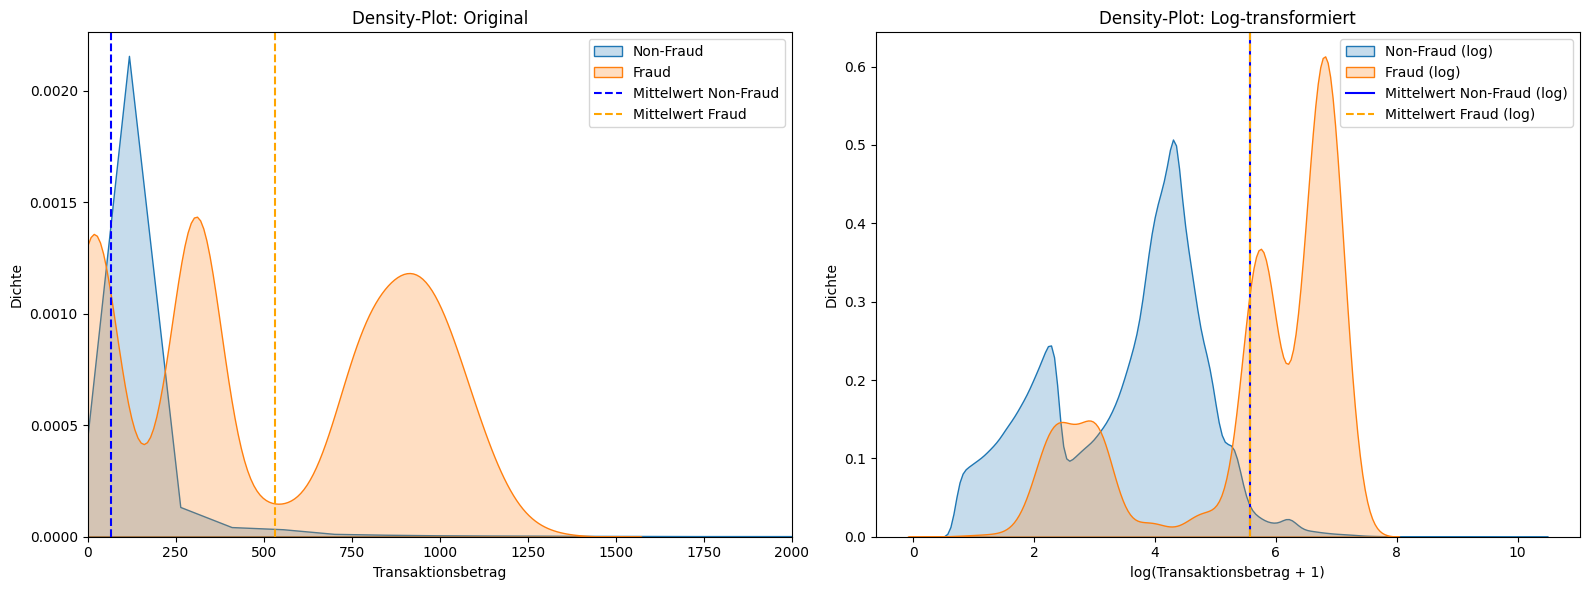

t-Statistik: 102.80470607258108
Einseitiger p-Wert: 0.0
H1 angenommen: Fraud-Transaktionen haben im Mittel höhere Beträge.


In [ ]:
from scipy.stats import ttest_ind
from scipy.stats import norm

# Daten laden

# Annahme: Spalten heißen "fraud" (0 = kein Betrug, 1 = Betrug) und "amount"
fraud_amounts = ds[ds["is_fraud"] == 1]["amt"]
nonfraud_amounts = ds[ds["is_fraud"] == 0]["amt"]

# Log-Transformation
fraud_log = np.log1p(fraud_amounts)
nonfraud_log = np.log1p(nonfraud_amounts)

# Mittelwerte berechnen
mean_nonfraud = nonfraud_amounts.mean()
mean_fraud = fraud_amounts.mean()
mean_nonfraud_log = fraud_log.mean()
mean_fraud_log = fraud_log.mean()

plt.figure(figsize=(16, 6))

# Linker Plot: Original Beträge
plt.subplot(1, 2, 1)
sns.kdeplot(nonfraud_amounts, label="Non-Fraud", shade=True)
sns.kdeplot(fraud_amounts, label="Fraud", shade=True)
plt.axvline(mean_nonfraud, color='blue', linestyle='--', label='Mittelwert Non-Fraud')
plt.axvline(mean_fraud, color='orange', linestyle='--', label='Mittelwert Fraud')
plt.xlabel("Transaktionsbetrag")
plt.ylabel("Dichte")
plt.title("Density-Plot: Original")
plt.xlim(0,2000)
plt.legend()

# Rechter Plot: Log-transformierte Beträge
plt.subplot(1, 2, 2)
sns.kdeplot(nonfraud_log, label="Non-Fraud (log)", shade=True)
sns.kdeplot(fraud_log, label="Fraud (log)", shade=True)
plt.axvline(mean_nonfraud_log, color='blue', linestyle='-', label='Mittelwert Non-Fraud (log)')
plt.axvline(mean_fraud_log, color='orange', linestyle='--', label='Mittelwert Fraud (log)')
plt.xlabel("log(Transaktionsbetrag + 1)")
plt.ylabel("Dichte")
plt.title("Density-Plot: Log-transformiert")
plt.legend()

plt.tight_layout()
plt.show()

# t-Test durchführen
t_stat, p_two_sided = ttest_ind(fraud_amounts, nonfraud_amounts, equal_var=False)
if t_stat > 0:
    p_one_sided = p_two_sided / 2
else:
    p_one_sided = 1 - (p_two_sided / 2)

print("t-Statistik:", t_stat)
print("Einseitiger p-Wert:", p_one_sided)

alpha = 0.05
if p_one_sided < alpha:
    print("H1 angenommen: Fraud-Transaktionen haben im Mittel höhere Beträge.")
else:
    print("H0 kann nicht verworfen werden.")

Wir sehen, dass die $H_0$ Hypothese von unserem t-Test für zwei unabhängige Gruppen zurückgewiesen wurde. Ebenso liegt der p-Wert unter 0.05. Zusätzlich sehen wir in unseren Plots, dass der Mittelwert für Fraud-Transaktionen auch höher ist. Deswegen konkludieren wir, dass die $H_0$ Hypothese zu verwerfen ist und somit die Alternativhypothese $H_1$ stimmt. Fraud-Transaktionen haben also einen höheren Betrags-Mittelwert als die Non-Fraud-Transaktionen.

**2.Hypothese: Fraud-Transaktionen sind häufiger online (statt POS) als Non-Fraud**

In [2]:
from scipy.stats import chi2_contingency

ds_filtered = ds[ds['category'].str.endswith(('_net', '_pos'))].copy()
ds_filtered['channel'] = np.where(ds_filtered['category'].str.endswith('_net'), 'online', 'offline')


contingency_table = pd.crosstab(ds_filtered['channel'], ds_filtered['is_fraud'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi2:", chi2)
print(f"p-value: {p:.4f}")

a = contingency_table.loc['online', 1]      # Fraud online
b = contingency_table.loc['offline', 1]     # Fraud offline
c = contingency_table.loc['online', 0]      # Non-Fraud online
d = contingency_table.loc['offline', 0]     # Non-Fraud offline

odds_ratio = (a / b) / (c / d)
print("Odds Ratio:", odds_ratio)

is_fraud       0     1
channel               
offline   317129  2836
online    203520  2762
Chi2: 243.6874284262562
p-value: 0.0000
Odds Ratio: 1.5175615409969307


Online Transaktionen sind risikoreicher was Betrug betrifft und anhand des hohen wertes für den chi2 test ist es auch statistisch signifikant also kein Zufall

/var/folders/cj/7vlgj44s1rv8_1ymt1nm1qpm0000gp/T/ipykernel_5209/3907450166.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='channel', y='fraud_rate', data=fraud_rate, palette='Set2')


(0.0, 0.023389437759959667)

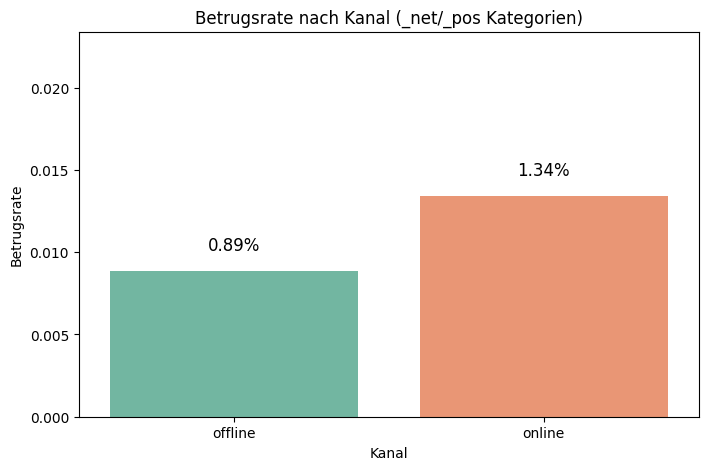

In [12]:
# Betrugsrate pro Kanal (bereits berechnet)
fraud_rate = ds_filtered.groupby('channel')['is_fraud'].mean().reset_index()
fraud_rate.rename(columns={'is_fraud': 'fraud_rate'}, inplace=True)

plt.figure(figsize=(8,5))
sns.barplot(x='channel', y='fraud_rate', data=fraud_rate, palette='Set2')

# Werte annotieren
for i, row in fraud_rate.iterrows():
    plt.text(i, row['fraud_rate'] + 0.001, f"{row['fraud_rate']*100:.2f}%", 
             ha='center', va='bottom', fontsize=12)

plt.title("Betrugsrate nach Kanal (_net/_pos Kategorien)")
plt.ylabel("Betrugsrate")
plt.xlabel("Kanal")
plt.ylim(0, fraud_rate['fraud_rate'].max() + 0.01)


**3.Hypothese: Anteil fraud Transaktionen von Frau und Mann ist nicht gleich**

$H_0:$ Der Anteil an Fraud-Transaktionen ist bei Frauen und Männern gleich.
$H_1:$ Der Anteil an Fraud-Transaktionen unterscheidet sich zwischen Frauen und Männern.

In [3]:
# Gruppen
group_M = ds[ds['gender'] == 'M']['is_fraud'].values
group_F = ds[ds['gender'] == 'F']['is_fraud'].values

# Beobachtete Differenz berechnen
observed_diff = group_F.mean() - group_M.mean()
print("Beobachtete Differenz (F-M):", observed_diff)

# Labels mischen und neue Differenzen berechnen
all_data = np.concatenate([group_M, group_F])
n_B = len(group_F)
n_permutations = 5000
perm_diffs = np.zeros(n_permutations)

for i in range(n_permutations):
    np.random.shuffle(all_data)
    perm_F = all_data[:n_B]
    perm_M = all_data[n_B:]
    perm_diffs[i] = perm_F.mean() - perm_M.mean()

# p-Wert berechnen (zweiseitig)
p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
print("Permutationstest p-Wert (zweiseitig):", p_value)

if p_value < 0.05:
    print("Signifikanter Unterschied zwischen F und M")
else:
    print("Kein signifikanter Unterschied")

Beobachtete Differenz (F-M): -0.0011646703093246774
Permutationstest p-Wert (zweiseitig): 0.0
Signifikanter Unterschied zwischen F und M


/var/folders/cj/7vlgj44s1rv8_1ymt1nm1qpm0000gp/T/ipykernel_5209/3892053491.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


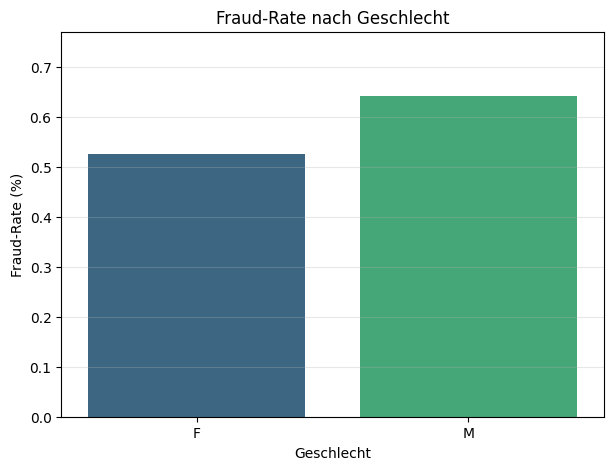

In [4]:
fraud_rate_gender = ds.groupby("gender")["is_fraud"].mean().reset_index()
fraud_rate_gender["is_fraud"] = fraud_rate_gender["is_fraud"] * 100  # Prozentangabe

plt.figure(figsize=(7,5))
sns.barplot(
    data=fraud_rate_gender,
    x="gender",
    y="is_fraud",
    palette="viridis"
)
plt.ylabel("Fraud-Rate (%)")
plt.xlabel("Geschlecht")
plt.title("Fraud-Rate nach Geschlecht")
plt.ylim(0, fraud_rate_gender["is_fraud"].max()*1.2)
plt.grid(axis="y", alpha=0.3)


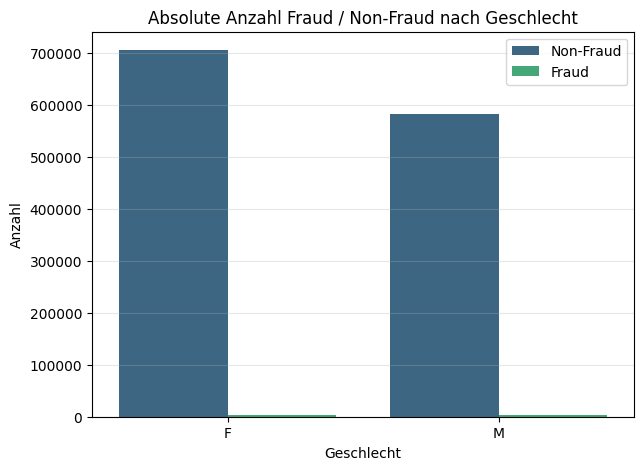

In [5]:
plt.figure(figsize=(7,5))
sns.countplot(data=ds, x="gender", hue="is_fraud", palette="viridis")
plt.title("Absolute Anzahl Fraud / Non-Fraud nach Geschlecht")
plt.xlabel("Geschlecht")
plt.ylabel("Anzahl")
plt.legend(["Non-Fraud", "Fraud"])
plt.grid(axis="y", alpha=0.3)

In [7]:

from scipy.stats import chi2_contingency
import math


# Fraud-Rate nach Geschlecht
p_M = ds[ds['gender'] == 'M']['is_fraud'].mean()
p_F = ds[ds['gender'] == 'F']['is_fraud'].mean()

risk_diff = p_M - p_F
print("Risk Difference (M - F):", risk_diff)

# Kontingenztafel
ct = pd.crosstab(ds['gender'], ds['is_fraud'])
print("\nKontingenztafel:\n", ct)

# Odds Ratio
a = ct.loc['M', 1]   # Fraud M
b = ct.loc['M', 0]   # Non-Fraud M
c = ct.loc['F', 1]   # Fraud F
d = ct.loc['F', 0]   # Non-Fraud F

odds_ratio = (a/b) / (c/d)
print("Odds Ratio (M vs F):", odds_ratio)

# Chi2 + Cramer's V
chi2, p, dof, expected = chi2_contingency(ct)
N = ct.sum().sum()
cramers_V = math.sqrt(chi2 / (N * (2 - 1)))  # k = 2 Kategorien
print("Cramér's V:", cramers_V)


Risk Difference (M - F): 0.0011646703093246774

Kontingenztafel:
 is_fraud       0     1
gender                
F         706128  3735
M         583041  3771
Odds Ratio (M vs F): 1.222785452501708
Cramér's V: 0.007631322322803248


Da der OR > 1 ist, haben wir eine höhere Betrugswahrscheinlichkeit bei Männern als bei Frauen also Männer fallen mehr zum Opfer von Fraud als Frauen
Der Zusammenhängende Effekt ist jedoch sehr schwach also haben wir einen geringen Zusammenhang 

95% Bootstrap-CI für Risk Difference: [0.0009, 0.0014]


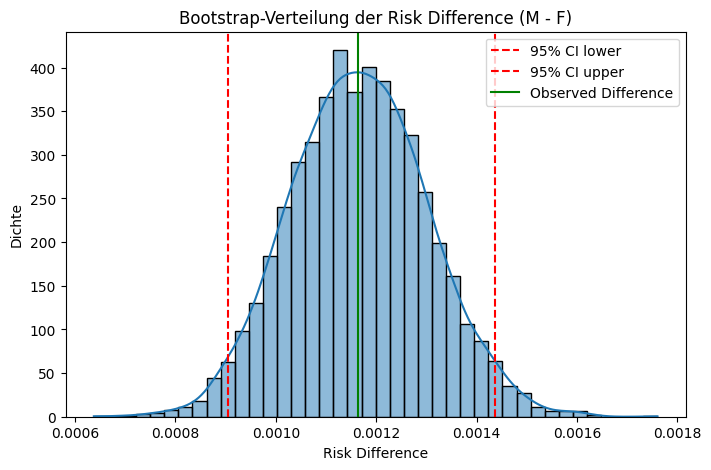

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Arrays
fraud_M = ds[ds['gender']=="M"]["is_fraud"].values
fraud_F = ds[ds['gender']=="F"]["is_fraud"].values

n_boot = 5000
boot_diffs = np.zeros(n_boot)

rng = np.random.default_rng(42)

for i in range(n_boot):
    boot_M = rng.choice(fraud_M, size=len(fraud_M), replace=True)
    boot_F = rng.choice(fraud_F, size=len(fraud_F), replace=True)
    boot_diffs[i] = boot_M.mean() - boot_F.mean()

# 95% CI
lower = np.percentile(boot_diffs, 2.5)
upper = np.percentile(boot_diffs, 97.5)
print(f"95% Bootstrap-CI für Risk Difference: [{lower:.4f}, {upper:.4f}]")

# Plot
plt.figure(figsize=(8,5))
sns.histplot(boot_diffs, bins=40, kde=True)
plt.axvline(lower, color="red", linestyle="--", label="95% CI lower")
plt.axvline(upper, color="red", linestyle="--", label="95% CI upper")
plt.axvline(risk_diff, color="green", linestyle="-", label="Observed Difference")
plt.title("Bootstrap-Verteilung der Risk Difference (M - F)")
plt.xlabel("Risk Difference")
plt.ylabel("Dichte")
plt.legend()


**4.Hypothese: Fraud-Transaktionen treten signifikant häufiger nachts auf**



In [18]:
# Uhrzeit extrahieren
ds['hour'] = pd.to_datetime(ds['trans_date_trans_time']).dt.hour
ds['time_of_day'] = np.where(ds['hour'].between(0, 6), 'night', 'day')

# Kontingenztabelle
contingency = pd.crosstab(ds['time_of_day'], ds['is_fraud'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(contingency)
print("Chi2:", chi2)
print("p-value:", p)

# Odds Ratio
a = contingency.loc['night', 1]
b = contingency.loc['day', 1]
c = contingency.loc['night', 0]
d = contingency.loc['day', 0]
odds_ratio = (a / b) / (c / d)
print("Odds Ratio:", odds_ratio)



is_fraud          0     1
time_of_day              
day          994712  4833
night        294457  2673
Chi2: 688.2915591507776
p-value: 1.0515068367612957e-151
Odds Ratio: 1.8683474247636542


/var/folders/cj/7vlgj44s1rv8_1ymt1nm1qpm0000gp/T/ipykernel_5209/1916118947.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_ds['datetime'] = pd.to_datetime(fraud_ds['unix_time'], unit='s')
/var/folders/cj/7vlgj44s1rv8_1ymt1nm1qpm0000gp/T/ipykernel_5209/1916118947.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_ds['hour'] = fraud_ds['datetime'].dt.hour


Text(0.5, 1.0, 'Histogramm der betrügerischen Transaktionen pro Stunde')

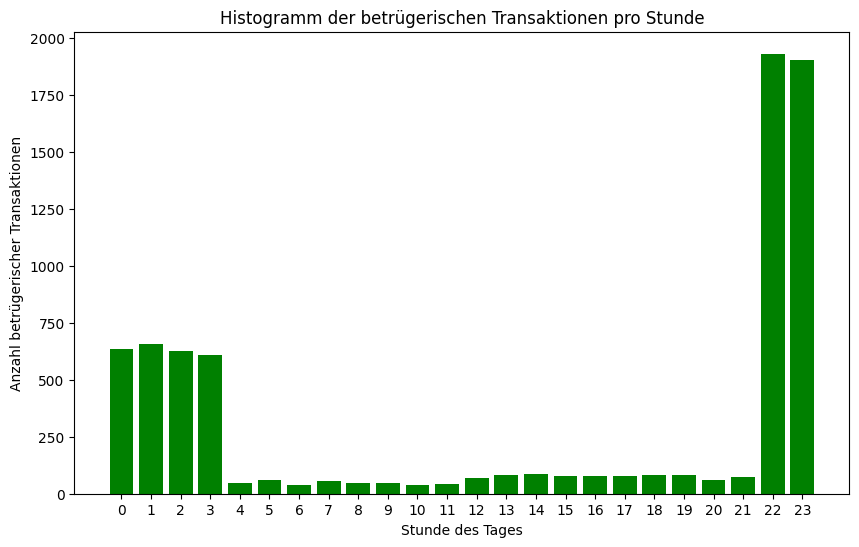

In [29]:
# Nur die betrügerischen Transaktionen auswählen
fraud_ds = ds[ds['is_fraud'] == 1]

# Unix-Zeit in datetime umwandeln
fraud_ds['datetime'] = pd.to_datetime(fraud_ds['unix_time'], unit='s')

# Stunde extrahieren
fraud_ds['hour'] = fraud_ds['datetime'].dt.hour

# Histogramm: Anzahl der betrügerischen Transaktionen pro Stunde
hour_counts = fraud_ds['hour'].value_counts().sort_index()

# Plot
plt.bar(hour_counts.index, hour_counts.values, color='green')
plt.xticks(range(24))  # alle Stunden von 0-23 anzeigen
plt.xlabel("Stunde des Tages")
plt.ylabel("Anzahl betrügerischer Transaktionen")
plt.title("Histogramm der betrügerischen Transaktionen pro Stunde")

Der Chi²-Test zeigt einen hochsignifikanten Unterschied in der Betrugswahrscheinlichkeit zwischen Tag- und Nachttransaktionen (Chi² = 688.29, p < 0.001). Die Odds Ratio von ca. 1,87 deutet darauf hin, dass Transaktionen in der Nacht fast doppelt so häufig betrügerisch sind wie solche am Tag. Somit besteht ein klarer statistischer Zusammenhang zwischen Tageszeit und Betrugswahrscheinlichkeit.

/var/folders/cj/7vlgj44s1rv8_1ymt1nm1qpm0000gp/T/ipykernel_5209/3937279395.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_of_day', y='is_fraud', data=fraud_rate_time, palette='Set2')


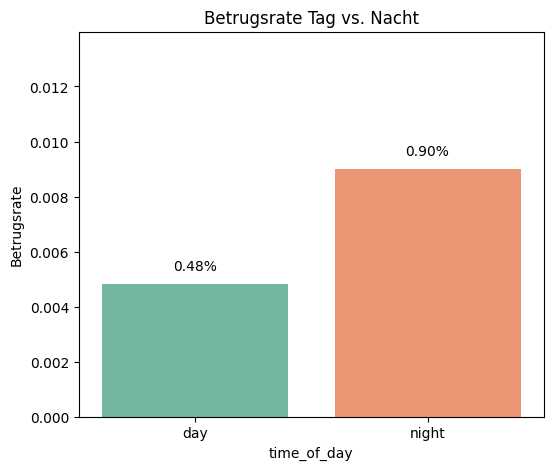

In [22]:
ds['hour'] = pd.to_datetime(ds['trans_date_trans_time']).dt.hour
ds['time_of_day'] = np.where(ds['hour'].between(0,6), 'night', 'day')

fraud_rate_time = ds.groupby('time_of_day')['is_fraud'].mean().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(x='time_of_day', y='is_fraud', data=fraud_rate_time, palette='Set2')

for i, row in fraud_rate_time.iterrows():
    plt.text(i, row['is_fraud'] + 0.0005, f"{row['is_fraud']*100:.2f}%", ha='center')

plt.ylabel("Betrugsrate")
plt.title("Betrugsrate Tag vs. Nacht")
plt.ylim(0, fraud_rate_time['is_fraud'].max() + 0.005)
plt.show()


**5.Hypothese: Fraud-Kunden zeigen Bursting Behavior**

/var/folders/cj/7vlgj44s1rv8_1ymt1nm1qpm0000gp/T/ipykernel_5209/3378761109.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  customer_burst = ds.groupby(['cc_num', pd.Grouper(key='timestamp', freq='1H')])['trans_num'].count().reset_index(name='transactions')


t: -1.4958978886667496
p-value: 0.13468090121460682
Cohen's d: -0.0031885312592114293
Mean Fraud: 1.0946339823504692
Mean Non-Fraud: 1.0956728167113132


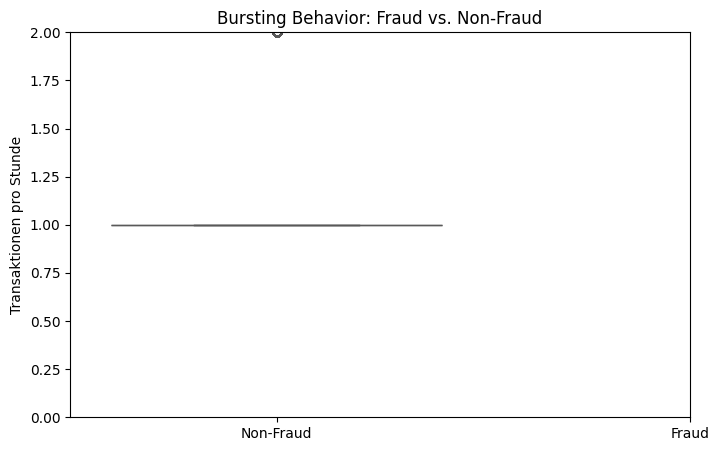

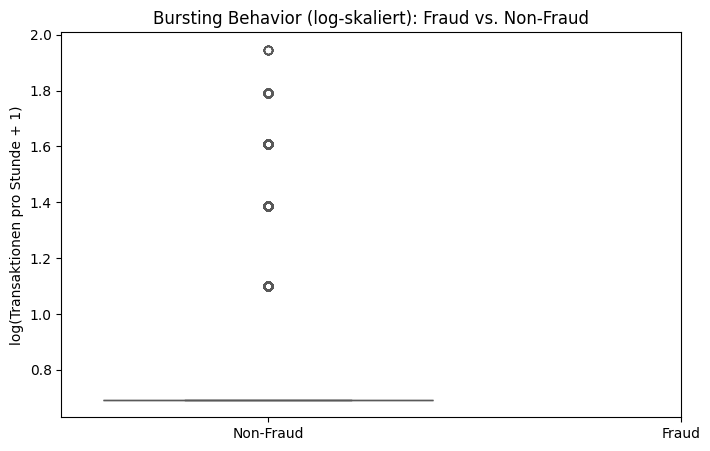

(0.0, 2.0)

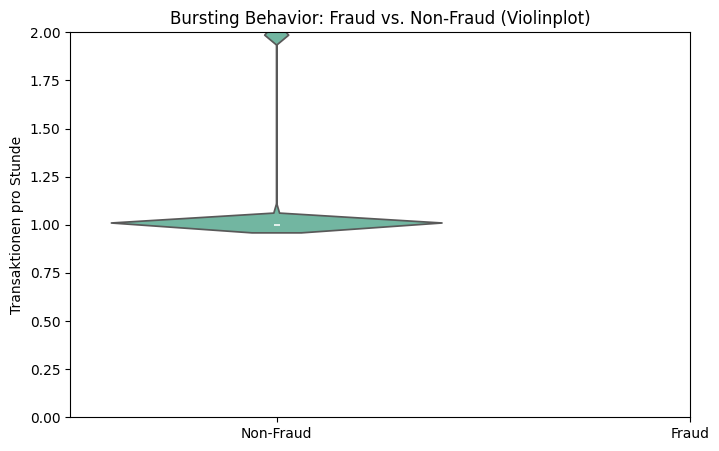

In [28]:
from scipy.stats import ttest_ind

# Timestamp konvertieren
ds['timestamp'] = pd.to_datetime(ds['trans_date_trans_time'])

# Transaktionen pro Kunde pro Stunde
customer_burst = ds.groupby(['cc_num', pd.Grouper(key='timestamp', freq='1H')])['trans_num'].count().reset_index(name='transactions')

# Markiere Fraud-Kunden
fraud_customers_set = set(ds[ds['is_fraud']==1]['cc_num'])
customer_burst['is_fraud_customer'] = customer_burst['cc_num'].apply(lambda x: 1 if x in fraud_customers_set else 0)

# Split Fraud vs. Non-Fraud
burst_fraud = customer_burst[customer_burst['is_fraud_customer']==1]['transactions']
burst_nonfraud = customer_burst[customer_burst['is_fraud_customer']==0]['transactions']

# Statistischer Test
t_stat, p_val = ttest_ind(burst_fraud, burst_nonfraud, equal_var=False)
d = (burst_fraud.mean() - burst_nonfraud.mean()) / np.sqrt((burst_fraud.std()**2 + burst_nonfraud.std()**2)/2)

print("t:", t_stat)
print("p-value:", p_val)
print("Cohen's d:", d)
print("Mean Fraud:", burst_fraud.mean())
print("Mean Non-Fraud:", burst_nonfraud.mean())

# -----------------------------
# 1. Boxplot (mit Ausreißerbegrenzung)
plt.figure(figsize=(8,5))
sns.boxplot(data=[burst_nonfraud, burst_fraud], palette='Set2')
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])
plt.ylabel("Transaktionen pro Stunde")
plt.title("Bursting Behavior: Fraud vs. Non-Fraud")
plt.ylim(0, burst_fraud.quantile(0.99))  # obere 1% Ausreißer begrenzen
plt.show()

# -----------------------------
# 2. Log-transformierter Boxplot (zeigt Unterschiede besser bei Schiefe)
plt.figure(figsize=(8,5))
sns.boxplot(data=[np.log1p(burst_nonfraud), np.log1p(burst_fraud)], palette='Set2')
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])
plt.ylabel("log(Transaktionen pro Stunde + 1)")
plt.title("Bursting Behavior (log-skaliert): Fraud vs. Non-Fraud")
plt.show()

# -----------------------------
# 3. Violinplot / Dichteplot
plt.figure(figsize=(8,5))
sns.violinplot(data=[burst_nonfraud, burst_fraud], palette='Set2')
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])
plt.ylabel("Transaktionen pro Stunde")
plt.title("Bursting Behavior: Fraud vs. Non-Fraud (Violinplot)")
plt.ylim(0, burst_fraud.quantile(0.95))  # obere 5% ignorieren

Der t-Test zeigt keinen signifikanten Unterschied im Bursting-Verhalten zwischen Fraud- und Non-Fraud-Kunden (t = -1.50, p ≈ 0.135). Die mittlere Anzahl an Transaktionen pro Stunde ist bei Fraud-Kunden (1,095) praktisch identisch mit der der Non-Fraud-Kunden (1,096). Auch die Effektgröße nach Cohen’s d ist mit -0,003 extrem klein, was darauf hinweist, dass kein relevanter Unterschied im Bursting-Verhalten vorliegt.

**6.Hypothese: Bestimmte Categories weisen höhere Fraud-Raten auf**

In [20]:
contingency_cat = pd.crosstab(ds['category'], ds['is_fraud'])
chi2, p, dof, expected = chi2_contingency(contingency_cat)

print("Chi2:", chi2)
print("p-value:", p)

# Effektgröße: Cramér's V
n = contingency_cat.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_cat.shape)-1)))
print("Cramér's V:", cramers_v)


Chi2: 6486.003269983207
p-value: 0.0
Cramér's V: 0.07072500922873913


Der Chi²-Test zeigt einen hochsignifikanten Unterschied der Fraud-Raten zwischen den Transaktionskategorien (Chi² = 6486.00, p < 0.001). Das Cramér's V von ca. 0,071 deutet auf einen schwachen, aber klar messbaren Zusammenhang zwischen Kategorie und Betrugswahrscheinlichkeit hin. Das bedeutet, dass bestimmte Kategorien tendenziell höhere Fraud-Raten aufweisen als andere, auch wenn der Effekt nicht stark ausgeprägt ist

/var/folders/cj/7vlgj44s1rv8_1ymt1nm1qpm0000gp/T/ipykernel_5209/2083098101.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='is_fraud', data=fraud_rate_cat, palette='Set3')


(0.0, 0.022561485703740915)

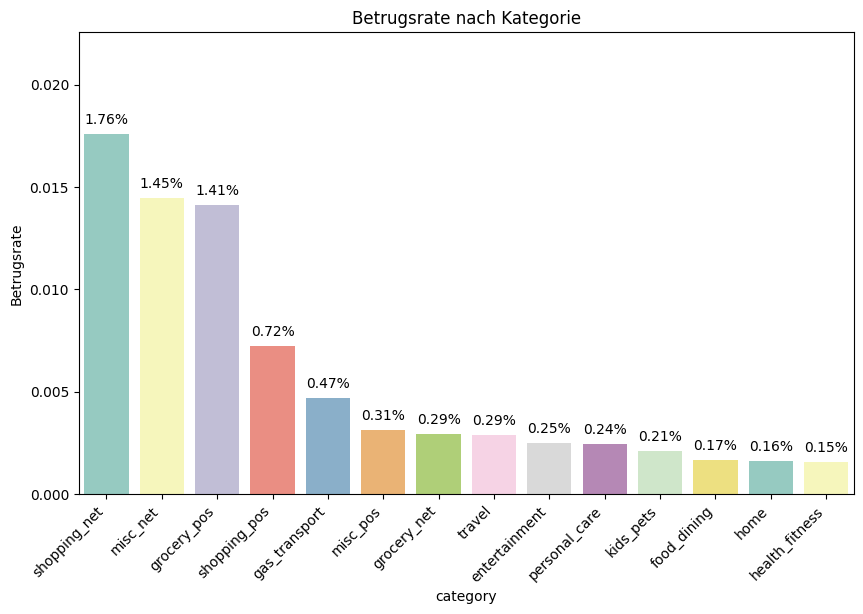

In [25]:
fraud_rate_cat = ds.groupby('category')['is_fraud'].mean().sort_values(ascending=False).reset_index()


sns.barplot(x='category', y='is_fraud', data=fraud_rate_cat, palette='Set3')
plt.xticks(rotation=45, ha='right')

for i, row in fraud_rate_cat.iterrows():
    plt.text(i, row['is_fraud'] + 0.0005, f"{row['is_fraud']*100:.2f}%", ha='center')

plt.ylabel("Betrugsrate")
plt.title("Betrugsrate nach Kategorie")
plt.ylim(0, fraud_rate_cat['is_fraud'].max() + 0.005)
